<a href="https://colab.research.google.com/github/cysorianoc/IBM_Data_Science/blob/main/Course_7_Mod_5_Model_Evaluation_Refinement_Laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Model Evaluation and Refinement**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, and try to refine your model's performance in predicting the price of a laptop, given the attribute values.


# Objectives

After completing this lab you will be able to:

 - Use training, testing and cross validation to improve the performance of the dataset.
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Import the data set into a data frame.


In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath)

Print the value of df.head().


In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [7]:
# check the result
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [11]:
# Write your code below and press Shift+Enter to execute
x_data=df.drop('Price', axis=1)
y_data=df['Price']


# <details><summary>Click here for the solution</summary>

```python
y_data = df['Price']
x_data = df.drop('Price',axis=1)
```

</details>


Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [13]:
# Write your code below and press Shift+Enter to execute
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 24
number of training samples: 214


<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])
```

</details>


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [17]:
# Step 1: Create a linear Regression object
lre=LinearRegression()
# Step 2: fit the model using the training dataset and the requested variable, here is CPU_frequency
lre.fit(x_train[['CPU_frequency']],y_train)
# Step 3: use the score method to calculate R2 on the test data and on the train data.
print('R-square for the train data is: ',lre.score(x_train[['CPU_frequency']],y_train))
print('R-square for the test data is: ',lre.score(x_test[['CPU_frequency']],y_test))

R-square for the train data is:  0.14829792099817973
R-square for the test data is:  -0.06599437350393789


<details><summary>Click here for the solution</summary>

```python
lre=LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)
print(lre.score(x_test[['CPU_frequency']], y_test))
print(lre.score(x_train[['CPU_frequency']], y_train))
```

</details>


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [20]:
Rcross=cross_val_score(lre,x_data[['CPU_frequency']], y_data,cv=4)
print('The mean of R-square of the four folds is:',Rcross.mean())

The mean of R-square of the four folds is: -0.16109232388595113


<details><summary>Click here for the solution</summary>

```python
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
```

</details>


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [21]:
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.5, random_state=1)


<details><summary>Click here for the solution</summary>

```python
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)
# fixing random_state to a fixed quantity helps maintain uniformity between multiple
# executions of the code.
```

</details>


To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute.
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


Text(3, 0.16, 'Maximum R^2 ')

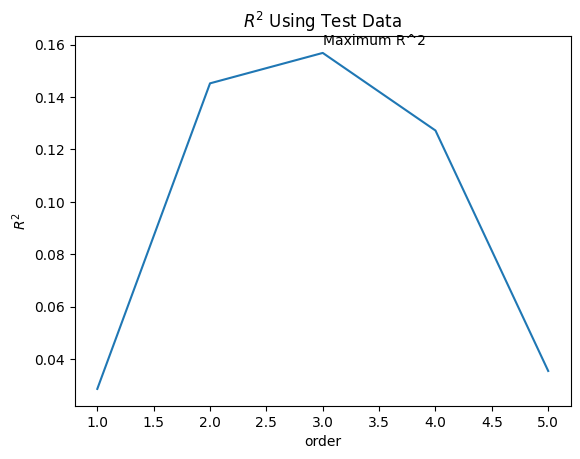

In [55]:
Rsqu_test = []

order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])

    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])

    lre.fit(x_train_pr, y_train)

    Rsqu_test.append(lre.score(x_test_pr, y_test))


plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('$R^2$')
plt.title('$R^2$ Using Test Data')
plt.text(3, 0.16, 'Maximum R^2 ') # Here 3 and 0.16 are the coordinates where max R2 is located

<details><summary>Click here for the solution</summary>

```python
lre = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))
```

</details>


Plot the values of R^2 scores against the order. Note the point where the score drops.


In [ ]:
# Write your code below and press Shift+Enter to execute
# Already done in the previous step

<details><summary>Click here for the solution</summary>

```python
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
```

</details>


# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [57]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])
x_test_pr = pr.fit_transform(x_test[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']])

# <details><summary>Click here for the solution</summary>

```python
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
x_test_pr=pr.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])
```

</details>


Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001.
Create a list of all Ridge Regression R^2 scores for training and testing data.


In [58]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)


100%|██████████| 1000/1000 [00:08<00:00, 112.40it/s, Test Score=0.426, Train Score=0.528]


<details><summary>Click here for the solution</summary>

```python
Rsqu_test = []
Rsqu_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)
```

</details>


Plot the R^2 values for training and testing sets with respect to the value of alpha


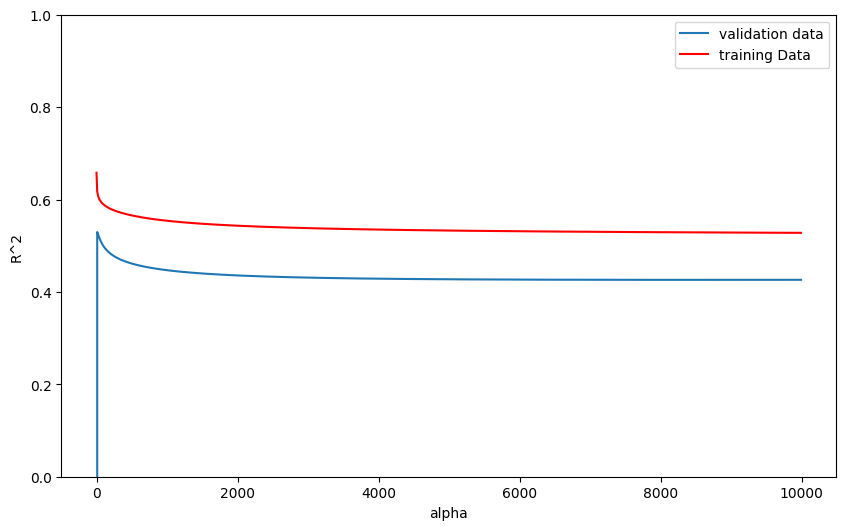

In [61]:
plt.figure(figsize=(10,6))
plt.plot(Alpha,Rsqu_test,label='validation data')
plt.plot(Alpha,Rsqu_train,'r',label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0,1)
plt.legend()


<details><summary>Click here for the solution</summary>

```python
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
```

</details>


# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best.
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [62]:
parameters1= [{'alpha': [0.001,0.1,1, 10]}]
parameters1


[{'alpha': [0.001, 0.1, 1, 10]}]

<details><summary>Click here for the solution</summary>

```python
parameters1= [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]
```

</details>


Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [63]:
RR=Ridge()
# Step 4: Create a grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)


<details><summary>Click here for the solution</summary>

```python
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
```
</details>


Fit the Grid Search to the training data.


In [64]:
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10]}])

<details><summary>Click here for the solution</summary>

```python
Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)
```
</details>


Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [67]:
# Write your code below and press Shift+Enter to execute
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))
print(BestRR.score(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_train))

0.42296349452687454
0.5183473130218088


<details><summary>Click here for the solution</summary>

```python
BestRR=Grid1.best_estimator_
print(BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU','Category']], y_test))
```
</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|
--!>


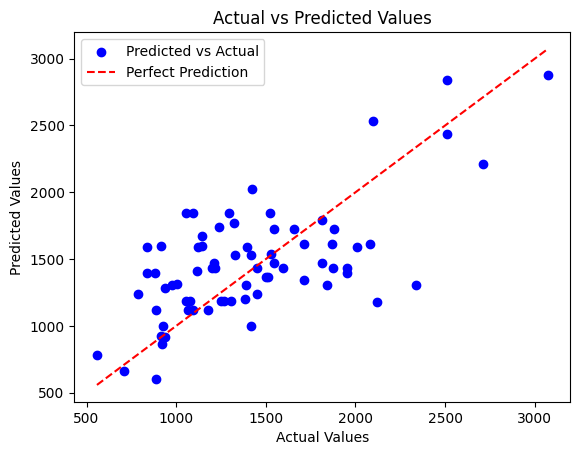

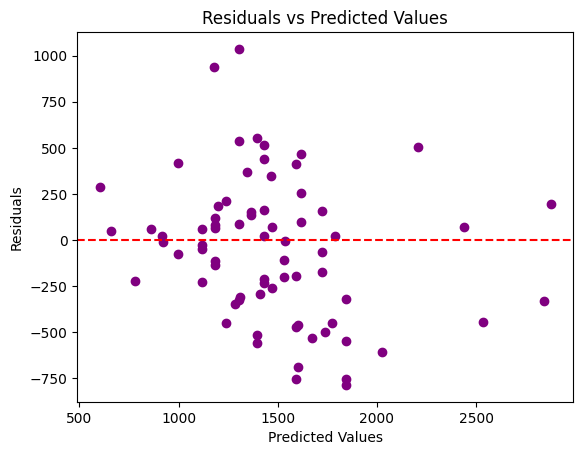

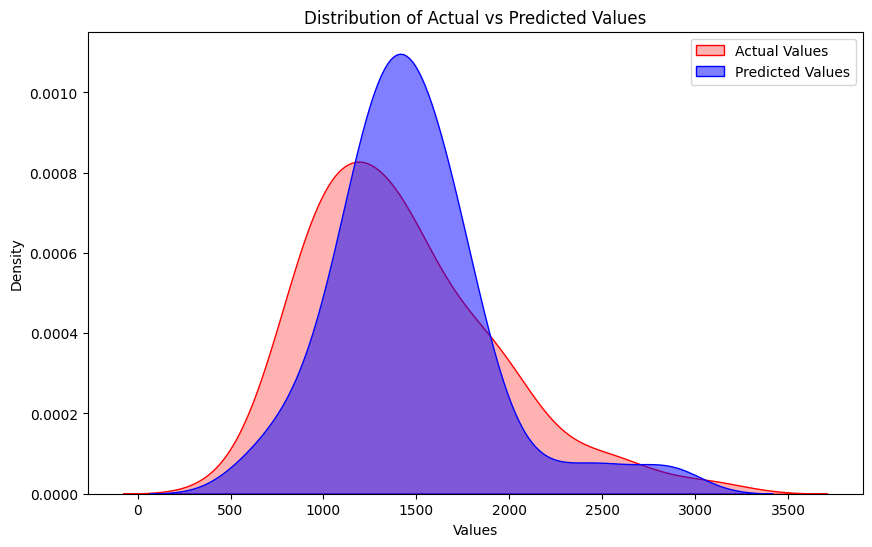

In [79]:
# Summary and workflow for Ridge regression
# Step 0: import the libraries
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Step 1: split the dataset into training dataset and testing dataset
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.3, random_state=1)


# Step 2:  define the values for hyperparameter alpha
parameters1= [{'alpha': [0.001,0.1,1, 10]}]

# Step3: Create a Ridge regression object
RR=Ridge()

# Step 4: Create a grid search object
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Step 5: Fit the model

Grid1.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

# Step 6: Using best_estimator_ make predictions. For example using x_data:

y_pred = Grid1.best_estimator_.predict(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])


# Step 7: Plot True and Predicted Values for test data
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

# Step 8: Residual plot to see the differences between actual and predicted values (test data)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

# Step 9: Distribution plot of the actual and predicted values (test data)
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='red', label='Actual Values', fill=True, alpha=0.3)
sns.kdeplot(y_pred, color='blue', label='Predicted Values', fill=True, alpha=0.5)
plt.title("Distribution of Actual vs Predicted Values")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()

# Ridge Regression

### 1. What is Ridge Regression?

Ridge regression is a variation of linear regression that includes a **regularization term** (also called a penalty term) to prevent the model from overfitting the training data. In ordinary linear regression, we aim to find the line (or hyperplane in higher dimensions) that best fits the data by minimizing the sum of squared errors between the predictions and actual values.

### 2. Why Use Ridge Regression?
In cases where features are highly correlated (multicollinearity) or when you have many features compared to observations, linear regression can produce large, unstable coefficients that don't generalize well to new data. Ridge regression helps by adding a penalty to the model, which discourages overly large coefficients.

### 3. How the Penalty Works
The Ridge regression cost function is:

$
Minimize \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2
$

Here:
- \( $y_i$ \): the actual target value for observation \( i \),
- \( $\hat{y}_i$ \): the predicted target value,
- \( $\beta_j$ \): the model coefficients (weights),
- \( \$alpha$ \): a tuning parameter that controls the regularization strength.

The regularization term \( $\alpha \sum_{j=1}^p \beta_j^2$ \) penalizes large values of the coefficients, effectively "shrinking" them. The larger the value of \( $\alpha$ \), the stronger the penalty, resulting in smaller coefficients. When \( $\alpha = 0$ \), Ridge regression is just regular linear regression.

---

# Grid Search (GridSearchCV)

### 1. What is GridSearchCV?
`GridSearchCV` is a tool in `scikit-learn` that automates the process of finding the best hyperparameters (like $alpha$  in Ridge regression) for a model. The "CV" part stands for **cross-validation**, meaning it evaluates each set of parameters by splitting the data into training and validation sets multiple times to get a more reliable estimate of performance.

### 2. How It Works
When you provide a set of potential values for a hyperparameter (like `alpha = [0.001, 0.1, 1, 10]`), `GridSearchCV` will:
1. Train a separate model for each possible value of \( \alpha \) (using cross-validation).
2. Calculate the model's performance (typically mean squared error or R-squared) for each value of \( \alpha \) over multiple splits.
3. Identify the value of $\alpha$ that gives the best performance across all splits.

---

# Example: Ridge Regression with Grid Search

Imagine we have a dataset where we're predicting a house's price based on its square footage and age. A basic linear regression might give us weights for each feature without any penalty, but suppose we notice that the model is **overfitting**.

### Step 1: Ridge Regression Setup
We decide to use Ridge regression with some regularization to reduce overfitting. We create a Ridge model and add a penalty term controlled by $\alpha$.

### Step 2: Using Grid Search to Find the Best $\alpha$
Instead of guessing the best value for $\alpha$, we set up a range of possible values: `alpha = [0.001, 0.1, 1, 10]`.

`GridSearchCV` will then:
- Train the Ridge regression model with \($\alpha$ = 0.001 \), calculate the cross-validation score.
- Repeat this with \( $\alpha$= 0.1 \), \( $\alpha$ = 1 \), and \( $\alpha$ = 10 \).
- Select the value of \( $\alpha$) that produces the best average score on cross-validation.

In the code above, this process is performed by these two lines:

```python
parameters1 = [{'alpha': [0.001, 0.1, 1, 10]}]  # Setting up possible values for alpha
Grid1 = GridSearchCV(Ridge(), parameters1, cv=4)  # Setting up the grid search for Ridge with cross-validation


# Summary
- Ridge regression adds regularization to standard linear regression to prevent overfitting.
- ```GridSearchCV``` tests multiple values for α (or other hyperparameters) to find the optimal setting for the Ridge model.

## Ok, that is fine but how to use the predictions ?

Let's see an example of how to use the prediction model for a certain type of computer:

In [87]:
import pandas as pd

# Example specifications of the new computer as a dictionary
new_computer_specs = {
    'Manufacturer': 'Dell',        # Make sure to encode this if needed
    'Category': 3,
    'GPU': 1,
    'OS': 1,
    'CPU_core': 4,
    'Screen_Size_inch': 15.6,
    'CPU_frequency': 0.7,
    'RAM_GB': 8,
    'Storage_GB_SSD': 256,
    'Weight_pounds': 4.5,
    'Screen-Full_HD': 1,
    'Screen-IPS_panel': 0
}

# Convert to DataFrame
new_data = pd.DataFrame([new_computer_specs])

# If encoding or scaling was applied to training data, apply the same to this data.
# For example, if Manufacturer was one-hot encoded, do that here.
# Assuming 'Category' and 'OS' were treated as numerical, no transformation needed for them.

# Make a prediction using the best model found by GridSearchCV
predicted_price = Grid1.best_estimator_.predict(new_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']])

print("Predicted Price of the new computer:", predicted_price[0])


Predicted Price of the new computer: 1038.8962340061667


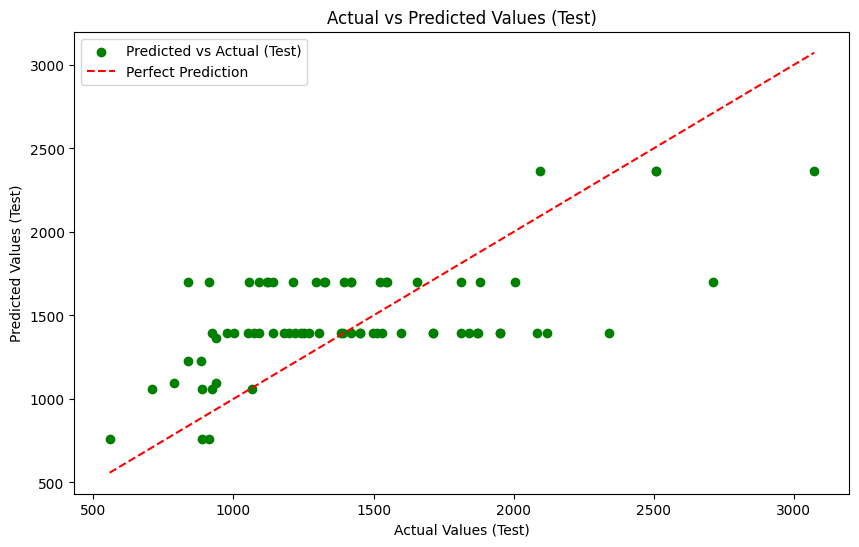

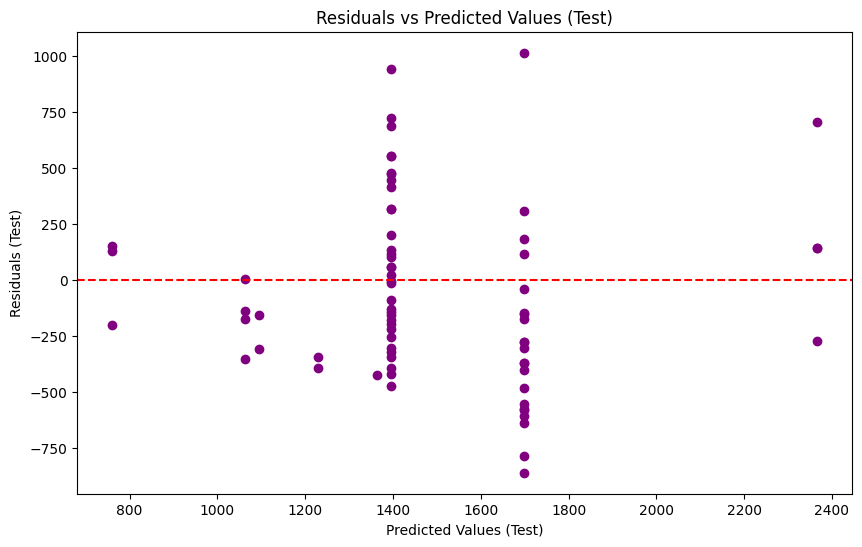

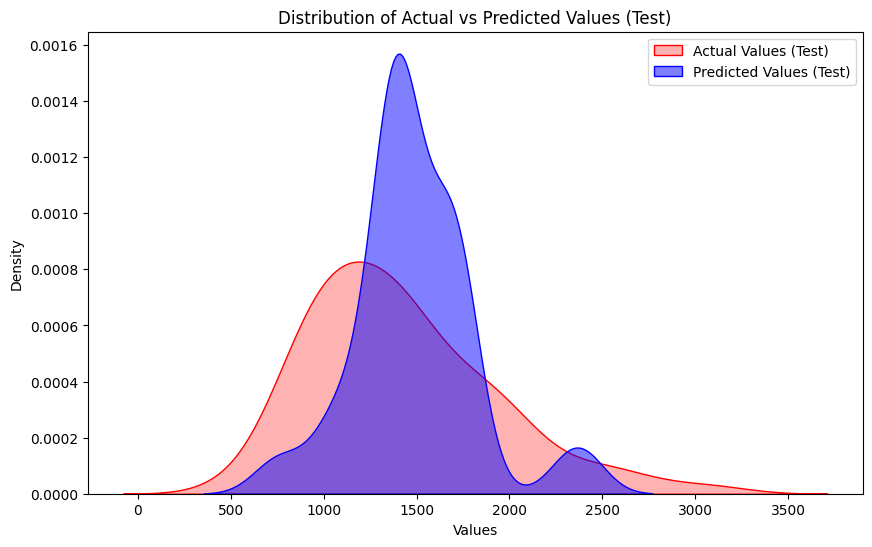

Predicted Price: 1245.4718521657871


In [86]:
## THIS IS A DRAFT CODE ONLY TO TRAIN A SMALLER MODEL .. NOT OFR USE
# Define the features and target with only RAM_GB and CPU_core
x_train_small = x_train[['RAM_GB', 'CPU_core']]
x_test_small = x_test[['RAM_GB', 'CPU_core']]

# Define the range for alpha as before
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100]}]

# Create a Ridge regression model and GridSearchCV object
RR2 = Ridge()
Grid2 = GridSearchCV(RR2, parameters2, cv=4)

# Fit the model using only RAM_GB and CPU_core
Grid2.fit(x_train_small, y_train)


# Use the retrained model to make predictions with only RAM_GB and CPU_core
y_pred_train = Grid2.best_estimator_.predict(x_train_small)
##y_pred_test = Grid2.best_estimator_.predict(x_test_small)


# Plot True vs Predicted Values for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='green', label='Predicted vs Actual (Test)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Actual vs Predicted Values (Test)")
plt.legend()
plt.show()


# Residuals Plot for Test Data
residuals_test = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values (Test)")
plt.ylabel("Residuals (Test)")
plt.title("Residuals vs Predicted Values (Test)")
plt.show()



# Distribution Plot of Actual vs Predicted Values for Test Data
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test, color='red', label='Actual Values (Test)', fill=True, alpha=0.3)
sns.kdeplot(y_pred_test, color='blue', label='Predicted Values (Test)', fill=True, alpha=0.5)
plt.title("Distribution of Actual vs Predicted Values (Test)")
plt.xlabel("Values")
plt.ylabel("Density")
plt.legend()
plt.show()



# Use the retrained model to make predictions with only RAM_GB and CPU_core
new_computer = pd.DataFrame({
    'RAM_GB': [8],       # Example value for RAM
    'CPU_core': [4]      # Example value for CPU cores
})

predicted_price = Grid2.best_estimator_.predict(new_computer)
print("Predicted Price:", predicted_price[0])
